
introduction:
The data that i have used is from The Movie Database (IMDb), and Box office Mojo (BOM)
this recomendation is based on the best studio, genre makes a lot of many, the running time of the movie.
- What are the most successful genres?
- Which genres are more popular and profitable?
- Does the runtime have any effect on the popularity of the genre?
The data that i have used is IMD data, and Box office Mojo

Limitation:
the unpadted data in BOM, uncorrect number regarding the forien gross which limit me to make another coparrsion between the domestic and the foreign gross


Future work:
I notice that the data from Box office Mojo (BOM) is not upto date so I would like to go and gather more accurate data specially regarding the foreign gross because it is not reflecting the real numbers

In [18]:
import pandas as pd # importing the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows=200

In [19]:
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')
tmdb.head()  # check what we have in the first row by using .head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
tmdb['release_date'] =  pd.to_datetime(tmdb['release_date']) # correct the date type

In [21]:
tmdb['year'] = pd.DatetimeIndex(tmdb['release_date']).year 

In [22]:
tmdb.drop(['Unnamed: 0','genre_ids','id','original_language','original_title'],axis =1,inplace= True)
#dropping unwanted columns

In [23]:
tmdb['title'] =tmdb['title'].str.lower()
# convert the data in the columns (title) to lower case to be able to merge based on the title with another df

In [24]:
tmdb = tmdb.rename(columns = {"title": "movie_title"}) #changing the name so we can merge based on name

In [25]:
tmdb.head()

,popularity,release_date,movie_title,vote_average,vote_count,year
0,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,2010
1,28.734,2010-03-26,how to train your dragon,7.7,7610,2010
2,28.515,2010-05-07,iron man 2,6.8,12368,2010
3,28.005,1995-11-22,toy story,7.9,10174,1995
4,27.920,2010-07-16,inception,8.3,22186,2010


In [26]:
imdb_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
imdb_title.head() # check what we have in the first row by using .head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [27]:
imdb_raing = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
imdb_raing.head() # check what we have in the first row by using .head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [28]:
imdb = pd.merge(imdb_title,imdb_raing, on= "tconst")

In [29]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [30]:
imdb['primary_title'] =imdb['primary_title'].str.lower()
# convert the data in the columns (title) to lower case to be able to merge based on the title with another df

In [31]:
imdb = imdb.rename(columns = {"primary_title": "movie_title"}) #changing the name so we can merge based on name

In [42]:
year_movie = pd.merge(imdb,tmdb, how="inner", left_on=["movie_title", "start_year"], right_on=["movie_title", "year"])
year_movie.head(1000) 

,tconst,movie_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,vote_average,vote_count,year
0,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,9.800,2018-11-02,7.0,64,2018
1,tt0192528,heaven & hell,Reverse Heaven,2018,104.0,Drama,4.0,72,0.600,2018-11-06,7.5,2,2018
2,tt0255820,return to babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,0.877,2013-08-11,7.0,1,2013
3,tt0315642,wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,3.881,2016-01-08,6.6,63,2016
4,tt0326965,in my sleep,In My Sleep,2010,104.0,"Drama,Mystery,Thriller",5.5,1889,1.795,2010-04-23,5.4,20,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,tt1389139,when the bough breaks,When the Bough Breaks,2016,107.0,"Crime,Drama,Horror",5.1,4729,8.062,2016-09-09,5.3,150,2016
996,tt1390398,"bless me, ultima","Bless Me, Ultima",2013,106.0,"Biography,Drama,History",6.4,1241,1.537,2013-02-22,6.4,10,2013
997,tt1390411,in the heart of the sea,In the Heart of the Sea,2015,122.0,"Action,Adventure,Biography",6.9,108628,14.330,2015-12-11,6.6,2137,2015
998,tt1390411,in the heart of the sea,In the Heart of the Sea,2015,122.0,"Action,Adventure,Biography",6.9,108628,14.330,2015-12-11,6.6,2137,2015


In [33]:
year_movie.shape

(12984, 13)

In [38]:
year_movie["tconst"].drop_duplicates(keep='first', inplace=True)

In [39]:
year_movie.shape

(12984, 13)

In [41]:
year_movie["tconst"].duplicated().any()

False

In [3]:
df0 = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')
df0.head()  # check what we have in the first row by using .head()

NameError: name 'df0' is not defined

In [3]:
df0.shape #check how many rows and columns are there

(26517, 10)

In [4]:
df0.columns 

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [5]:
df0.dtypes # checking the data type for each columns, if they are the correct type or not 

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [6]:
df0.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [7]:
df0.drop(['Unnamed: 0','genre_ids','id','original_language','original_title','release_date'], axis =1, inplace= True)
#dropping unwanted columns

In [8]:
df0.head()# check the new df

,popularity,title,vote_average,vote_count
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,How to Train Your Dragon,7.7,7610
2,28.515,Iron Man 2,6.8,12368
3,28.005,Toy Story,7.9,10174
4,27.920,Inception,8.3,22186


In [9]:
df0.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

popularity      0
title           0
vote_average    0
vote_count      0
dtype: int64

In [10]:
df0.duplicated().sum() # check if we have duplicate

1024

In [11]:
df0.drop_duplicates(keep='first', inplace=True)# dropping the duplicate

In [12]:
df0.shape

(25493, 4)

In [13]:
df0.rename(columns = {"title": "movie_name"}) #changing the name so we can merge based on name

,popularity,movie_name,vote_average,vote_count
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,How to Train Your Dragon,7.7,7610
2,28.515,Iron Man 2,6.8,12368
3,28.005,Toy Story,7.9,10174
4,27.920,Inception,8.3,22186
...,...,...,...,...
26512,0.600,Laboratory Conditions,0.0,1
26513,0.600,_EXHIBIT_84xxx_,0.0,1
26514,0.600,The Last One,0.0,1
26515,0.600,Trailer Made,0.0,1


In [14]:
df1 = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
df1.head() # check what we have in the first row by using .head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
df1.shape #check how many rows and columns are there

(146144, 6)

In [16]:
df1.columns # tconst (string) - alphanumeric unique identifier of the title from: https://www.imdb.com/interfaces/

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [17]:
df1.dtypes # checking the data type for each columns, if they are the correct type or not 

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [18]:
df1.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [19]:
31739/146144  # I can't drop 22%  runtime_minutes' data so I will change it to 0 

0.21717620976571053

In [20]:
df1["original_title"] = df1["original_title"].fillna(value = "No Name") # fill the 21 null with "No Name"

In [21]:
df1["genres"] = df1["genres"].fillna(value = "No Genre") # fill 5408 null with "No Genre"

In [22]:
df1["runtime_minutes"] = df1["runtime_minutes"].fillna(value = 0) # fill 31739 null in runtime_minute with zero

In [23]:
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146144 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             146144 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [25]:
df1.nunique()

tconst             146144
primary_title      136071
original_title     137774
start_year             19
runtime_minutes       368
genres               1086
dtype: int64

In [26]:
df1.duplicated("tconst", keep= "last").any() # checking for duplicates

False

In [27]:
df1.describe() 
# you can see that the max start_year is 2115??? we don't need years after the current year (2020)
#because we don't have enough information about them

,start_year,runtime_minutes
count,146144.000000,146144.000000
mean,2014.621798,67.469427
std,2.733583,151.420470
min,2010.000000,0.000000
25%,2012.000000,34.000000
50%,2015.000000,79.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


In [28]:
df1[df1["start_year"]== 2115]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,0.0,Drama


In [29]:
df1["start_year"].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

In [30]:
df1.drop(df1[df1["start_year"]>2020].index, inplace = True) # deleting years after 2020

In [31]:
df1.describe()

,start_year,runtime_minutes
count,146018.000000,146018.000000
mean,2014.615219,67.522607
std,2.714505,151.473279
min,2010.000000,0.000000
25%,2012.000000,35.000000
50%,2015.000000,79.000000
75%,2017.000000,95.000000
max,2020.000000,51420.000000


In [32]:
df1.duplicated().any() # check if I have any duplicae in the df1

False

In [33]:
df2 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
df2.head() # check what we have in the first row by using .head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [34]:
df2.shape #check how many rows and columns are there

(73856, 3)

In [35]:
df2.columns # tconst (string) - alphanumeric unique identifier of the title from: https://www.imdb.com/interfaces/

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [36]:
df2.dtypes # checking the data type for each columns, if they are the correct type or not

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [37]:
df2.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [38]:
df2.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [39]:
df2.duplicated().any() # check if I have any duplicae in the df2

False

In [40]:
df= pd.merge(df1,df2, on="tconst") # merging the df1,df2 on the common column "tconst" and assign it to df

In [41]:
df.head() #check what we have in the new df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [42]:
df.duplicated().any() # check if I have any duplicae in the df

False

In [43]:
df.isnull().any() # check if I have any null

tconst             False
primary_title      False
original_title     False
start_year         False
runtime_minutes    False
genres             False
averagerating      False
numvotes           False
dtype: bool

In [44]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,84.888228,6.332729,3.523662e+03
std,2.614807,199.608940,1.474978,3.029402e+04
min,2010.000000,0.000000,1.000000,5.000000e+00
25%,2012.000000,75.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,4.900000e+01
75%,2016.000000,101.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [45]:
df[(df["averagerating"]>8)& (df["numvotes"]>50)]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
91,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
216,tt0770802,Samsara,Samsara,2011,102.0,"Documentary,Music",8.5,29725
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
291,tt0825334,Caravaggio and My Mother the Pope,Caravaggio and My Mother the Pope,2018,90.0,"Comedy,Drama",8.9,51
...,...,...,...,...,...,...,...,...
73840,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
73841,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505
73842,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365


## What genre of movies makes the most money? the most sucessful genre
## what is the best runnig time?

based on the we can recommend to Microsoft what genre of movie is the profitable

In [46]:
df3 = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
df3.head() # check what we have in the first row by using .head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [47]:
df3.shape #check how many rows and columns are there

(3387, 5)

In [48]:
df3.columns # check what we have in columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [49]:
df3.dtypes # checking the data type for each columns, if they are the correct type or not: 
#the foreign_ gross should be float but it is object so we should look into it

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [50]:
df3.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [51]:
df3.describe()# use .describe() to get summary statistic for each columns 

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [52]:
28/3387 # check the percentage of domestic_gross null which is 0.8 %

0.008266902863891349

In [53]:
df3["domestic_gross"] = df3["domestic_gross"].fillna(value = 0)

In [54]:
 1350/3387 # check the percentage of foreign_gross null which is 40 %

0.3985828166519043

In [55]:
df3["foreign_gross"] = df3["foreign_gross"].str.replace(',', '').astype(float)

In [56]:
df3["foreign_gross"] = df3["foreign_gross"].fillna(value = 0) 
#I have tried to fillna with median, mean and zero all of the gave the same mean so i filled it with 0
#to give better presentation ogfthe given data

In [57]:
df3.isnull().sum() # checking how many null do we still have

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [58]:
df3.dtypes # making sure that our type is the correct one

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [59]:
#pd.value_counts(df3["studio"])
#df3["studio"].unique()

In [60]:
df3["studio"].dropna()#(3387, 5) 

0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3382, dtype: object

In [61]:
df3.duplicated().any() # check if we have duplicate

False

In [62]:
#df3.isnull().sum()

In [63]:
#df4 = df3[df3.isna().any(axis=1)] # locatw where is the null value

In [64]:
#df4.head(10)

In [65]:
#df3["studio"] = df3["studio"].replace(to_replace="NaN", value = "No Name") # fill 5 null with "No Name"

In [66]:
df3["total_gross"]=df3["domestic_gross"]+df3["foreign_gross"] #adding new column tota which is the sum of domestic& foreign

In [67]:
df3.head() # # check what we have now af by using ter adding new columns.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [68]:
#df3= df3.groupby(["studio","total_gross"])# grouping the  studio and the total and order the number to do some stat and graph
#which studio getting the highest 

In [69]:
#best_ten = df3["studio"].value_counts().head(10)

In [70]:
df3 = df3.drop(columns = "year") # dropping the year columns so it want aggregate when we use group by

In [71]:
top_ten = df3.groupby(["studio"]).agg("sum") #group by studio

In [72]:
top_ten = top_ten.sort_values("total_gross", ascending=False).head(10) # sort the value based on the total_gross
#ascending and taking only the top ten and assign it to top_ten dataframe

In [73]:
top_ten.reset_index(inplace=True) # reset out index
top_ten

,studio,domestic_gross,foreign_gross,total_gross
0,BV,1.841903e+10,2.579385e+10,4.421288e+10
1,Fox,1.094950e+10,2.005587e+10,3.100537e+10
2,WB,1.216805e+10,1.866790e+10,3.083595e+10
3,Uni.,1.290239e+10,1.685477e+10,2.975716e+10
4,Sony,8.459683e+09,1.394535e+10,2.240504e+10
5,Par.,7.685871e+09,1.186338e+10,1.954926e+10
6,WB (NL),3.995700e+09,6.339000e+09,1.033470e+10
7,LGF,4.118963e+09,4.482619e+09,8.601583e+09
8,LG/S,2.078200e+09,3.353724e+09,5.431924e+09
9,P/DW,1.682900e+09,3.393600e+09,5.076500e+09


## Which Studios are doing the best in the film industry?/ what are the top ten studios in the film industry?

Based on the data from Box Office Mojo, we can check which studio is doing the best in terms of revenue so Microsoft can contract with. so according to the bellow visualization 
1. Walt Disney Studios (formerly Buena Vista)
2. 20th Century Fox
3. Warner Bros.
4. Universal Pictures
5. Sony Pictures Motion Picture Group
6. Paramount Pictures
7. New Line Cinema
8. Lionsgate Films
9. LG/S
10. DreamWorks Pictures

So based on the visualization, it is recommended that Microsoft contract with one of the top five studios

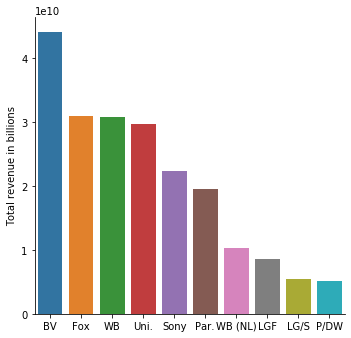

In [74]:
g = sns.catplot(x='studio', y='total_gross', data=top_ten, kind='bar') # using seaborn for graphing
g.set_axis_labels("", "Total revenue in billions")
g.set_titles("The best Studios")

Text(0, 0.5, 'Total revenue in billions')

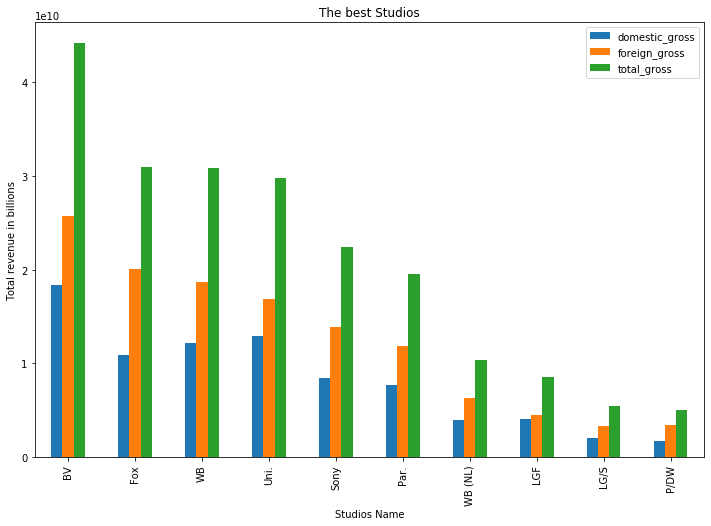

In [75]:
plot_data = top_ten.plot(x='studio', kind="bar", legend=True, title="The best Studios", figsize=(12,8)) # using panda bar plot for graphing
plot_data.set_xlabel("Studios Name")
plot_data.set_ylabel("Total revenue in billions")


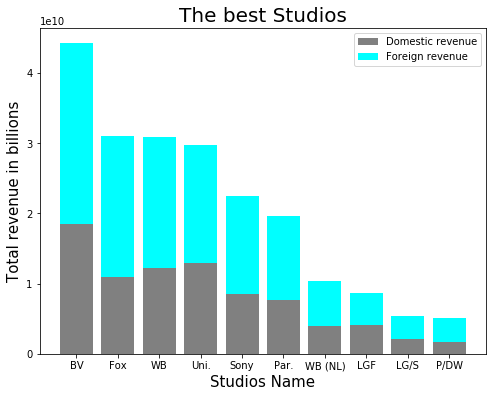

In [76]:
plt.figure(figsize =(8,6)) #using Matplotlib for graphing
plt.bar(range(len(top_ten.studio)), top_ten.domestic_gross, color='gray')
plt.bar(range(len(top_ten.studio)), top_ten.foreign_gross, color='cyan', bottom=top_ten.domestic_gross)
plt.xlabel('Studios Name', fontsize=15)
plt.ylabel('Total revenue in billions', fontsize=15)
plt.xticks(range(len(top_ten.studio)), top_ten.studio)
plt.legend(['Domestic revenue', 'Foreign revenue'])
plt.title('The best Studios', fontsize=20)
plt.xticks(np.arange(len(top_ten.studio)), top_ten.studio)
plt.show()


In [77]:
Splitting the genres category
df_merged['genres']=df_merged['genres'].str.split(",",3)
df_merged=df_merged.explode('genres')
df_merged.info()

SyntaxError: invalid syntax (<ipython-input-77-b09c41f2dcd4>, line 1)

In [ ]:
df00 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df00.head() # check what we have in the first row by using .head()
# keep it as backup

In [ ]:
#https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee 


Action          28
Adventure       12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37

In [ ]:
df_3 = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip')
df_3.head() # check what we have in the first row by using .head()
# I don't need this one

In [ ]:
df_2 = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip')
df_2.head() # check what we have in the first row by using .head()
# I don't need this one

In [ ]:
df_1 = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip')
df_1.head() # check what we have in the first row by using .head()
# I don't need this one

In [ ]:

data= df00
x = df00['production_budget'].values.reshape(-1, 1)
y = df00['worldwide_gross'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

plt.xlabel('entry a')
plt.ylabel('entry b')

In [ ]:
sns.scatterplot(data=df00, x="production_budget", y="worldwide_gross")

In [ ]:
df00.plot(kind='scatter',x='production_budget',y='worldwide_gross')


plt.show()

In [ ]:
sns.lmplot(data=df00, x="production_budget", y="worldwide_gross",fit_reg=True) 